# Введение в анализ данных
## НИУ ВШЭ, 2019-2020 учебный год

### Домашнее задание №3

Задание выполнил(а): Дарья Матяш

### Общая информация

__Дата выдачи:__ 06.04.2020

__Дедлайн:__ 23:59 20.04.2020


### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
min(\text{points}, 18)  \times 10 / 18,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 18, за каждые полтора балла сверху вы получите 1 бонусный балл (максимум 2). Также вы можете использовать бонусные баллы, которые накопили ранее.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-6: rd5CNrr

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

### Подготовка данных

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

In [4]:
# Качаем датасет

!wget https://www.dropbox.com/s/tg55q9mrziroyrs/train_subset.csv

/bin/sh: wget: command not found


### Данные

Мы имеем дело с данными с торговой платформы Avito.
Для каждого товара представлены следующие параметры:
 - title
 - description
 - Category_name
 - Category

Имеется информация об объектах 50 классов.
Задача: по новым объектам (title, description) предсказать Category.
(Очевидно, что параметр Category_name для предсказания классов использовать нельзя)

In [5]:
data = pd.read_csv("train_subset.csv", index_col='id')

data.head()

,title,description,Category_name,Category
id,,,,
382220,Прихожая,В хорошем состоянии. Торг,Мебель и интерьер,20
397529,Кордиант 215/55/16 Летние,Кордиант 215/55/16 Летние/\n /\nАртикул: 1737l...,Запчасти и аксессуары,10
584569,Стол,"Стол, 2 рабочих места . Стол серого цвета, в д...",Мебель и интерьер,20
2513100,Комбинезон,Размер-42/44,"Одежда, обувь, аксессуары",27
1091886,Ветровка,На 2 года,Детская одежда и обувь,29


data.shape

In [6]:
X = data[['title', 'description']].to_numpy()
y = data['Category'].to_numpy()

del data

Сразу разделим выборку на train и test.
Никакие данные из test для обучения использовать нельзя!

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_train[:5]

array([['Сапоги 46 размер новые', 'Сапоги 46 размер новые'],
       ['Светильники потолочный swarovski',
        'светильники потолочные swarovski 6 штук , цена за штуку. В эксплуатации 2 года , продаются в связи со сменой интерьера в квартире'],
       ['iPhone 7 plus 128GB Red красный в наличии',
        '\xa0/\n/\n Данная цена только для подписчиков Instagram: iQmac/\n/\n Новый красный айфон 7 Plus в наличии это элегантный и мощный смартфон, который готов в полной мере раскрыть новые возможности iOS 10. Аппарат с 4-ядерным процессором А10 и 3 ГБ ОЗУ с легкостью решает самые ресурсоемкие задачи, позволяя наслаждаться быстродействием «тяжелых» приложений и игр на 5,5-дюймовом дисплее. Аппарат получил экран, как у iPad Pro, так что картинка теперь соответствует кинематографическому стандарту.'],
       ['Пион Ирис Ромашка рассада',
        'Пион куст 500 р ( более 10 шт)/\nСаженец/ корень 100р/\nРастут у нас более 70 лет/\nРозовые, бордовые и белые/\nНа фото цветы 2018г/\nП. Зубчанинов

In [9]:
y_train[:5]

array([ 27,  20,  84, 106,  27])

Сразу же сделаю копию X_train, X_test для удобства:

In [10]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

### Токенизация (1 балл)


Токенизация -- разбиение текста на мелкие части, которые можно обработать машинными методами.
Можно использовать разные алгоритмы токенизации.
Можете использовать WordPunctTokenizer или подобрать какой-то другой, если считаете, что он лучше подойдет для этой задачи.


In [11]:
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()

text = 'Здраствуйте. Я, Кирилл. Хотел бы чтобы вы сделали игру, 3Д-экшон суть такова...'

print("before:", text,)
print("after:", tokenizer.tokenize(text.lower()),)

before: Здраствуйте. Я, Кирилл. Хотел бы чтобы вы сделали игру, 3Д-экшон суть такова...
after: ['здраствуйте', '.', 'я', ',', 'кирилл', '.', 'хотел', 'бы', 'чтобы', 'вы', 'сделали', 'игру', ',', '3д', '-', 'экшон', 'суть', 'такова', '...']


__Задание:__ реализуйте функцию ниже

In [12]:
def preprocess(text: str) -> str:
    """
    Данная функция принимает на вход текст, 
    а возвращает тот же текст, но с пробелами между каждым токеном
    """
    words = [w.lower() for w in tokenizer.tokenize(text)]
    ans = ' '.join(words)
    return ans

In [13]:
assert preprocess(text) == 'здраствуйте . я , кирилл . хотел бы чтобы вы сделали игру , 3д - экшон суть такова ...'

__Задание:__ токенизируйте title и description в train и test

In [14]:
print(X_train[1])
print(X_test[1])

['Светильники потолочный swarovski'
 'светильники потолочные swarovski 6 штук , цена за штуку. В эксплуатации 2 года , продаются в связи со сменой интерьера в квартире']
['Сандалики Totto для мальчика'
 'Продаю сандалики Totto для малыша! Размер 20,по стельке 12 см.']


In [15]:
# Your code here
all_tokens = []
all_tokens_t = []
for i in range(len(X_train)):
    X_train[i][0], X_train[i][1] = preprocess(X_train[i][0]), preprocess(X_train[i][1])
    all_tokens.append(X_train[i][0] + ' ' + X_train[i][1])
for i in range(len(X_test)):
    all_tokens_t.append(X_test[i][0] + ' ' + X_test[i][1])
    X_test[i][0], X_test[i][1] = preprocess(X_test[i][0]), preprocess(X_test[i][1])

In [16]:
print(X_train[1])
print(X_test[1])

['светильники потолочный swarovski'
 'светильники потолочные swarovski 6 штук , цена за штуку . в эксплуатации 2 года , продаются в связи со сменой интерьера в квартире']
['сандалики totto для мальчика'
 'продаю сандалики totto для малыша ! размер 20 , по стельке 12 см .']


In [100]:
assert X_train[10][1] == 'продам иж планета 3 , 76 год , ( стоит на старом учёте , документы утеряны ) на ходу , хорошее состояние , все интересующие вопросы по телефону ( с родной коляской на 3 тысячи дороже ) . торга не будет .'

### BOW (3 балла)

Один из традиционных подходов -- построение bag of words.

Метод состоит в следующем:

 - Составить словарь самых часто встречающихся слов в train data
 - Для каждого примера из train посчитать, сколько раз каждое слово из словаря в нём встречается


 В sklearn есть CountVectorizer, но в этом задании его использовать нельзя.

__Задание:__ создайте словарь, где в соответствии каждому токену стоит количество раз, которое оно встретилось в X_train

In [101]:
from collections import Counter
tokens_c = Counter(' '.join(all_tokens).split())
tokens = dict(tokens_c)

In [102]:
assert tokens['сапоги'] == 454

__Задание:__ выведите 10 самых частотных и 10 самых редких токенов

In [103]:
# your code here
print([tup[0] for tup in tokens_c.most_common(10)])
print([tup[0] for tup in tokens_c.most_common()[:-11:-1]])

['/', ',', '.', '-', 'в', 'и', 'на', './', ':', 'с']
['фрионом', 'хлебозаводская', 'дооснастить', 'беспрецедентно', 'понравившейся', 'объективную', 'столиц', 'петровского', 'гремят', 'шуршат']


__Задание:__ оставьте в словаре только топ 10000 самых частотных токенов

In [104]:
# your code here
tokens = dict(tokens_c.most_common(10000))
tokens_ind = {}
for i in range(10000):
    tokens_ind[(list(tokens.keys())[i])] = i

__Задание:__ реализуйте функцию, которая предложение переводит в вектор из чисел. То есть каждому слову из словаря сопоставляется количество раз, которое оно встретилось в предложении.

In [105]:
def text_to_bow(text: str) -> np.array:
   
    """
    Возвращает вектор, где для каждого слова из most_common
    указано количество его употреблений
    input: строка
    output: вектор размерности словаря
    """
    # your code here
    output = np.zeros(10000)
    text_c = Counter(text.split())
    for token in text.split():
        if token in tokens_ind:
            output[tokens_ind[token]] = text_c[token]
    return np.array(output)

__Задание:__ а теперь реализуйте функцию, которая преобразует наш датасет и для каждого текста из description сопоставляет вектор.

In [106]:
def items_to_bow(texts: np.array) -> np.array:
    ans = []
    for i in range(len(texts)):
        ans.append(text_to_bow(texts[i][1]))
    return np.array(ans)

In [107]:
X_train_bow = items_to_bow(X_train)
X_test_bow = items_to_bow(X_test)

In [108]:
# чтобы видеть проход по итерациям можно использовать библиотеку tqdm
# она работает примерно так
from tqdm import tqdm

for i in tqdm(range(100)):
    pass

100%|██████████| 100/100 [00:00<00:00, 565270.08it/s]


In [109]:
from sklearn.metrics import accuracy_score

### Логистическая регрессия и SVC (0.5 балла)


Теперь описание каждого товара представлено, как точка в многомерном пространстве.
Очень важно запомнить эту идею: дальше мы будем рассматривать разные способы перехода от текста к точке в пространстве.

Для BOW каждое измерение в пространстве -- какое-то слово.
Мы предполагаем, что текст описывается набором каких-то популярных слов, которые в нём встречаются, а близкие по смыслу тексты будут использовать одинаковые слова.

Обучите логистическую регрессию и SVC с базовыми параметрами.


In [110]:
print(X_train_bow[:3])
print(y_train[:3])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 2. 1. ... 0. 0. 0.]
 [4. 5. 3. ... 0. 0. 0.]]
[27 20 84]


In [111]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_bow, y_train)
assert accuracy_score(lr_model.predict(X_test_bow), y_test) > 0.7

/Users/pikachu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pikachu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [113]:
print(accuracy_score(lr_model.predict(X_test_bow), y_test))

0.7046666666666667


In [114]:
from sklearn.svm import LinearSVC


svc_model = LinearSVC(C = 0.1, max_iter=10000)
svc_model.fit(X_train_bow, y_train)

assert accuracy_score(svc_model.predict(X_test_bow), y_test) > 0.68

In [115]:
print(accuracy_score(svc_model.predict(X_test_bow), y_test))

0.7211111111111111


### Модификация признаков (0.5 балла)

Добавьте title товара в bow с произвольным весом, как изменится качество?

In [27]:
# Your code here
import random

def text_to_bow_new(text):
    output = np.zeros(10000)
    text_c = Counter(text.split())
    for token in text.split():
        if token in tokens_ind:
            a = random.randint(0, len(text.split()) + 10)
            output[tokens_ind[token]] = a
    return np.array(output)

def items_to_bow(texts: np.array) -> np.array:
    ans = []
    for i in range(len(texts)):
        ans.append(text_to_bow_new(texts[i][0]))
    return np.array(ans)


X_train_bow_new = X_train_bow + items_to_bow(X_train)
X_test_bow_new = X_test_bow + items_to_bow(X_test)

In [28]:
X_train_bow_new.shape

(21000, 10000)

In [29]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_bow_new, y_train)
assert accuracy_score(lr_model.predict(X_test_bow_new), y_test) > 0.7

/Users/pikachu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pikachu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [30]:
print(accuracy_score(lr_model.predict(X_test_bow_new), y_test))

0.7533333333333333


In [42]:
from sklearn.svm import LinearSVC


svc_model = LinearSVC(C = 0.1, max_iter=10000)
svc_model.fit(X_train_bow_new, y_train)

assert accuracy_score(svc_model.predict(X_test_bow_new), y_test) > 0.68

/home/artem/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [31]:
print(accuracy_score(svc_model.predict(X_test_bow_new), y_test))

0.7346666666666667


Нормализуйте данные (`sklearn.preprocessing.normalize`) перед обучением. Что станет с качеством и почему?

In [32]:
# Your code here
import sklearn
lr_model = LogisticRegression(random_state=42)
lr_model.fit(sklearn.preprocessing.normalize(X_train_bow_new), y_train)

/Users/pikachu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pikachu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
print(accuracy_score(lr_model.predict(sklearn.preprocessing.normalize(X_test_bow_new)), y_test))

0.6853333333333333


In [34]:
from sklearn.svm import LinearSVC


svc_model = LinearSVC(C = 0.1, max_iter=10000)
svc_model.fit(sklearn.preprocessing.normalize(X_train_bow_new), y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [35]:
print(accuracy_score(svc_model.predict(sklearn.preprocessing.normalize(X_test_bow_new)), y_test))

0.727


Качество при нормализации данных стало несколько хуже. Мне кажется, это связано с тем, что после нормализации их числовое представление становится более-менее "одинаковыми", поэтому тяжелее более точно выдать верный ответ.

### Mystem (1 балл)

Попробуйте обучиться, используя токенизатор mystem. Сравните качество.

In [52]:
!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz
!cp mystem /bin

/bin/sh: wget: command not found
tar: Error opening archive: Failed to open 'mystem-3.0-linux3.1-64bit.tar.gz'
cp: mystem: No such file or directory


In [53]:
pip install git+https://github.com/nlpub/pymystem3

  Cloning https://github.com/nlpub/pymystem3 to /private/var/folders/79/pl4fy2zs3dgcw9j_y0w6dht40000gn/T/pip-req-build-rh2zl64_
  Running command git clone -q https://github.com/nlpub/pymystem3 /private/var/folders/79/pl4fy2zs3dgcw9j_y0w6dht40000gn/T/pip-req-build-rh2zl64_
  Stored in directory: /private/var/folders/79/pl4fy2zs3dgcw9j_y0w6dht40000gn/T/pip-ephem-wheel-cache-rervy0am/wheels/7d/75/c2/216a594291dee680749ce12c60d16125cfe1f363059e7163dc
Successfully built pymystem3
Note: you may need to restart the kernel to use updated packages.


In [97]:
from pymystem3 import Mystem

mystem_analyzer = Mystem()


def preprocess_ms(text: str) -> str:
    words = [w.lower() for w in mystem_analyzer.lemmatize(text)]
    ans = ' '.join(words)
    return ans

all_tokens_ms = []
X_train_ms = np.copy(X_train_copy)
X_test_ms = np.copy(X_test_copy)
for i in range(len(X_train)):
    X_train_ms[i][0], X_train_ms[i][1] = preprocess_ms(X_train_copy[i][0]), preprocess_ms(X_train_copy[i][1])
    all_tokens_ms.append(' '.join(X_train_ms[i]))
for i in range(len(X_test)):
     X_test_ms[i][0], X_test_ms[i][1] = preprocess_ms(X_test_ms[i][0]), preprocess_ms(X_test_ms[i][1])

In [98]:
print(X_train[1])
print(X_train_copy[1])

['светильники потолочный swarovski'
 'светильники потолочные swarovski 6 штук , цена за штуку . в эксплуатации 2 года , продаются в связи со сменой интерьера в квартире']
['Светильники потолочный swarovski'
 'светильники потолочные swarovski 6 штук , цена за штуку. В эксплуатации 2 года , продаются в связи со сменой интерьера в квартире']


In [99]:
print(X_train_ms[1])

['светильник   потолочный   swarovski \n'
 'светильник   потолочный   swarovski   6   штука  ,  цена   за   штука .  в   эксплуатация   2   год  ,  продаваться   в   связь   со   смена   интерьер   в   квартира \n']


In [251]:
print(all_tokens_ms[1])

светильник   потолочный   swarovski 
 светильник   потолочный   swarovski   6   штука  ,  цена   за   штука .  в   эксплуатация   2   год  ,  продаваться   в   связь   со   смена   интерьер   в   квартира 



In [44]:
tokens_c_ms = Counter(' '.join(all_tokens_ms).split())

tokens_ms = dict(tokens_c_ms.most_common(10000))
tokens_ind_ms = {}
for i in range(10000):
    tokens_ind_ms[(list(tokens_ms.keys())[i])] = i


def text_to_ms(text: str) -> np.array:
    output = np.zeros(10000)
    text_c = Counter(text.split())
    for token in text.split():
        if token in tokens_ind_ms:
            output[tokens_ind_ms[token]] = text_c[token]
    return np.array(output)
    

def items_to_ms(texts: np.array) -> np.array:
    ans = []
    for i in range(len(texts)):
        ans.append(text_to_ms(texts[i][0] + ' ' +texts[i][1]))
    return np.array(ans)

In [45]:
X_train_ms_n = items_to_ms(X_train_ms)
X_test_ms_n = items_to_ms(X_test_ms)

In [46]:
print(X_train_ms_n[1])
print(X_train_ms[1])
print(X_train_ms[1][0])

[0. 1. 2. ... 0. 0. 0.]
['светильник   потолочный   swarovski \n'
 'светильник   потолочный   swarovski   6   штука  ,  цена   за   штука   .   в   эксплуатация   2   год  ,  продаваться   в   связь   со   смена   интерьер   в   квартира \n']
светильник   потолочный   swarovski 



In [47]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_ms_n, y_train)

/Users/pikachu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
print(accuracy_score(lr_model.predict(X_test_ms_n), y_test))

0.8012222222222222


In [49]:
svc_model = LinearSVC(C = 0.1, max_iter=10000)
svc_model.fit(X_train_ms_n, y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [50]:
print(accuracy_score(svc_model.predict(X_test_ms_n), y_test))

0.807


Качество стало выше, мне кажется это логичным, так как намного лучше изначально рассматривать леммы слов, а не словоформы в данной задаче. А также хочу заметить, что при использовании колонки title есть больше текста для анализа и точность тоже становится лучше.

### TF-IDF (5 баллов)

Не все слова полезны одинаково, давайте попробуем [взвесить](http://tfidf.com/) их, чтобы отобрать более полезные.


> TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
> 
> IDF(t) = log_e(Total number of documents / Number of documents with term t in it).


В sklearn есть TfidfVectorizer, но в этом задании его использовать нельзя. Для простоты посчитайте общий tf-idf для title и description (то есть каждому объекту надо сопоставить вектор, где как документ будет рассматриваться конкатенация title и description).

__Задание:__ составьте словарь, где каждому слову из изначального словаря будет стоять в соответствии количество документов, где это слово встретилось.

In [262]:
# your code here
tokens_ind_tf = {}
for i in range(10000):
    tokens_ind_tf[(list(tokens_ind_ms.keys())[i])] = 0

for i in range(len(X_train)):
    text_c = Counter((X_train_ms[i][0] + ' ' + X_train_ms[i][1]).split())
    for token in list(text_c.keys()):
        if token in tokens_ind_tf:
            tokens_ind_tf[token] += 1

__Задание:__ реализуйте функцию, где тексту в соответствие ставится tf-idf вектор. 

In [274]:
def text_to_tfidf(text: str) -> np.array:
    """
    Возвращает вектор, где для каждого слова из словаря
    указан tf-idf
    """
    output = np.zeros(10000)
    text_c = Counter(text.split())
    for token in text.split():
        if token in tokens_ind_tf:
            tf = text_c[token] / len(text.split())
            idf = np.log( len(X_train) / tokens_ind_tf[token])
            output[tokens_ind_ms[token]] =  tf * idf
    return np.array(output)

__Задание:__ а теперь реализуйте функцию, которая преобразует наш датасет и для каждого объекта сопоставляет вектор tf-idf.

In [275]:
def items_to_tfidf(items: np.array) -> np.array:
    """ 
    Для каждого товара возвращает его tfidf вектор
    """
    ans = []
    for i in range(len(items)):
        ans.append(text_to_tfidf(items[i][0] + ' ' + items[i][1]))
    return np.array(ans)

In [276]:
X_train_tfidf = items_to_tfidf(X_train_ms)
X_test_tfidf = items_to_tfidf(X_test_ms)

__Задание:__ обучите логистическую регрессию и SVC, оцените качество (accuracy_score)

In [281]:
# Your code here
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_tfidf, y_train)

/Users/pikachu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pikachu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [283]:
print(accuracy_score(lr_model.predict(X_test_tfidf), y_test))

0.6914444444444444


In [280]:
svc_model = LinearSVC(C = 0.1, max_iter=10000)
svc_model.fit(X_train_tfidf, y_train)

print(accuracy_score(svc_model.predict(X_test_tfidf), y_test))

0.7563333333333333


### Hashing Vectorizer (1 балл)

Попробуйте использовать `sklearn.feature_extraction.text.HashingVectorizer` для векторизации текстов.
Обязательно оцените качество работы алгоритмов классификации с использованием новой векторизации.

In [116]:
from sklearn.feature_extraction.text import HashingVectorizer

In [117]:
vec = HashingVectorizer(n_features=20000)
X = vec.fit_transform(all_tokens)

In [118]:
clf = LogisticRegression(random_state=42)
clf.fit(X, y_train)

/Users/pikachu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pikachu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
n_lr = accuracy_score(clf.predict(vec.transform(all_tokens_t)), y_test)
print(n_lr)

0.7181111111111111


In [128]:
svc_model = LinearSVC()
svc_model.fit(X, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [129]:
n_svc = accuracy_score(svc_model.predict(vec.transform(all_tokens_t)), y_test)
print(n_svc)

0.8128888888888889


### Word Vectors (3 балла)

Давайте попробуем другой подход -- кажому слову сопоставим какой-то эмбеддинг (вектор).

Вектора будут небольшой размерности. Таким образом мы снизим количество параметров в модели.

Вектора мы возьмём уже готовые (обученные на текстах их интернета), так что наша модель будет знать некоторую дополнительную информацию о внешнем мире.

In [92]:
!wget https://www.dropbox.com/s/0x7oxso6x93efzj/ru.tar.gz

--2020-04-06 13:16:01--  https://www.dropbox.com/s/0x7oxso6x93efzj/ru.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.70.1, 2620:100:6026:1::a27d:4601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.70.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0x7oxso6x93efzj/ru.tar.gz [following]
--2020-04-06 13:16:02--  https://www.dropbox.com/s/raw/0x7oxso6x93efzj/ru.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc928e2096207ae262b4622f28a3.dl.dropboxusercontent.com/cd/0/inline/A1Wa_ahhaEliEnHa9OB_SIFYkkJl938CPEQTCVC8R9zbAicKG8Rb59Agc0wrC3co0Vag-WrJFwxLX8r7M4RzN3J1zXIkDF1oTrlrYRUF1WiohQ/file# [following]
--2020-04-06 13:16:02--  https://uc928e2096207ae262b4622f28a3.dl.dropboxusercontent.com/cd/0/inline/A1Wa_ahhaEliEnHa9OB_SIFYkkJl938CPEQTCVC8R9zbAicKG8Rb59Agc0wrC3co0Vag-WrJFwxLX8r7M4RzN3J1zXIkDF1oTrlrYRUF1WiohQ/file
Resolving uc928e2096207ae

In [95]:
!tar -xzf ru.tar.gz

In [319]:
import gensim
from gensim.models.wrappers import FastText

model = FastText.load_fasttext_format('ru.bin')

In [320]:
# как мы видим, каждому слову данная модель сопоставляет вектор размерности 300

print(model['привет'].shape)
print(model['привет'])

(300,)
[ 0.02916384  0.02167605  0.05127367 -0.00971958  0.0465235  -0.03945766
  0.02737866  0.00638128 -0.03774629 -0.04257201 -0.00995653  0.02291315
 -0.02301722  0.06697998 -0.03674482 -0.02403202 -0.05404469  0.01372932
  0.00926399 -0.0013149   0.11941359 -0.022448    0.04011497  0.06980549
  0.00407011 -0.09384539  0.03050164 -0.02578281 -0.03525181 -0.06603175
  0.04752798  0.05874675  0.01983666  0.06092105 -0.00957561  0.08307806
 -0.01288903  0.04705157  0.02198839 -0.00649013 -0.0171444   0.03302203
  0.02124882 -0.01902875 -0.05235172  0.03458685 -0.01409259 -0.07477519
  0.01916078  0.02985001  0.0086322   0.03051201  0.02831862  0.04549561
  0.00761138 -0.05459622  0.09056009 -0.08807947 -0.05420396 -0.04793203
 -0.05672329 -0.03025264 -0.03024072 -0.05890108 -0.03137474  0.03292617
  0.05440779 -0.04548327 -0.07266086 -0.09327219  0.07247883  0.0111061
  0.01824225 -0.10570452  0.05110046 -0.04659343 -0.03277056 -0.00803401
 -0.03978698  0.00826598 -0.01074128  0.01843

In [332]:
# Будем рассматривать эмбеддинг предложения как сумму эмбеддингов токенов

def sentence_embedding(sentence: str) -> np.array:
    """
    Складывает вектора токенов строки sentence
    """
    # your code here
    sum_vec = np.zeros(300)
    for word in sentence.split():
        if word in model:
            sum_vec += model[word]
    return sum_vec

In [333]:
assert np.allclose(sentence_embedding('сдаётся уютный , тёплый гараж для стартапов в ml')[::50],
                   np.array([ 0.08189847,  0.07249198, -0.15601222,  0.03782297,  0.09215296, -0.23092946]))

__Задание:__ сделайте все то же, что в предыдущих пунктах -- реализуйте функцию, которая преобразует данные, а затем обучите логистическую регрессию и SVM, оцените качество.

In [35]:
# a lot of your code here
def embed_everything(texts):
    ans = []
    for i in range(len(texts)):
        ans.append(sentence_embedding(texts[i]))
    return np.array(ans)

In [346]:
X_train_emb = embed_everything(all_tokens)

In [348]:
X_test_emb = embed_everything(all_tokens_t)

In [349]:
lr_model_emb = LinearSVC(C = 0.1, max_iter=10000)
lr_model_emb.fit(X_train_emb, y_train)

print(accuracy_score(lr_model_emb.predict(X_test_emb), y_test))

0.5778888888888889


/Users/pikachu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Что дальше? (6 баллов)

Для получения максимальной оценки вам нужно решить любые 2 пункта. Решение каждого пункта даст вам полтора балла:

1. Реализовать N-Gram модели текстовой классификации (__1.5 балла__)

2. Поработать с другими эмбеддингами для слов (например word2vec или GloVe) (__1.5 балла__)

3. Другие способы токенизации (pymorphy2, spaCy) (__1.5 балла__)

4. Добиться качества > 0.765 на тестовых данных (попробуйте другие токенизаторы, предобработку текста, и любые другие идеи, которые вам придут в голову) (__1.5 балла__)

Снабжайте код пояснениями и графиками.
Обязательно необходимо написать вывод по каждому пункту, который вы реализуете.

**Задание 1**

Я хочу сравнить работу разных методов на разных N-граммах, для начала на всякий случай испортируем нужные модули(т.к. данная тетрадка запускается всегда в разное время в разных местах):

Хочу сказать сразу, что я считаю самым классным взять леммы, но буду работать с токенами исходной базы данных.

In [145]:
from sklearn.linear_model import LogisticRegression # можно заменить на любимый классификатор
from sklearn.feature_extraction.text import CountVectorizer
from nltk import ngrams

In [149]:
def preprocess_ngrams(text, n):
    spl = text.split()
    ans = []
    n_grams = []
    if len(spl) >= n:
        n_grams = list(ngrams(spl, n))
        for gr in n_grams:
            ans.append(' '.join(gr))
    return ans

In [202]:
print(X_train[i])

['пальто'
 'пальто зимние размер 54 , мех песец , капишон и мех отстегиваются , цвет тумно - серый , цвет лучше чем на фото .']


In [151]:
all_5grams = []
all_5grams_t = []
all_2grams = []
all_2grams_t = []

In [152]:
for i in range(len(X_train)):
    all_5grams.extend(preprocess_ngrams(X_train[i][1], 5))
    all_2grams.extend(preprocess_ngrams(X_train[i][1], 2))
for i in range(len(X_test)):
    all_5grams_t.extend(preprocess_ngrams(X_test[i][1], 5))
    all_2grams_t.extend(preprocess_ngrams(X_test[i][1], 2))

In [119]:
from collections import Counter
c = Counter()

In [120]:
for word in all_5grams:
    c[word] += 1

In [121]:
fgrams_dict = dict(c.copy())

In [122]:
print(list(fgrams_dict.keys())[:10], list(fgrams_dict.values())[:10])

['светильники потолочные swarovski 6 штук', 'потолочные swarovski 6 штук ,', 'swarovski 6 штук , цена', '6 штук , цена за', 'штук , цена за штуку', ', цена за штуку .', 'цена за штуку . в', 'за штуку . в эксплуатации', 'штуку . в эксплуатации 2', '. в эксплуатации 2 года'] [6, 6, 6, 6, 6, 6, 7, 6, 6, 6]


In [123]:
d = Counter()

In [124]:
for word in all_5grams_t:
    d[word] += 1
fgrams_t_dict = dict(d)

In [125]:
print(list(fgrams_t_dict.keys())[:10], list(fgrams_t_dict.values())[:10])

['"* 3308 * винт сдвижной', '3308 * винт сдвижной панели', '* винт сдвижной панели потолка', 'винт сдвижной панели потолка oem', 'сдвижной панели потолка oem :', 'панели потолка oem : 54107199476', 'потолка oem : 54107199476 (', 'oem : 54107199476 ( 54', ': 54107199476 ( 54 10', '54107199476 ( 54 10 7'] [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


In [154]:
e = Counter()

In [155]:
for word in all_2grams:
    e[word] += 1
bigrams_dict = dict(e)

In [156]:
f = Counter()

In [157]:
for word in all_2grams_t:
    f[word] += 1
bigrams_t_dict = dict(f)

In [158]:
print(list(bigrams_dict.keys())[:10], list(bigrams_dict.values())[:10])

['сапоги 46', '46 размер', 'размер новые', 'светильники потолочные', 'потолочные swarovski', 'swarovski 6', '6 штук', 'штук ,', ', цена', 'цена за'] [1, 14, 1, 1, 1, 1, 13, 13, 255, 562]


In [159]:
print(list(bigrams_t_dict.keys())[:10], list(bigrams_t_dict.values())[:10])

['"* 3308', '3308 *', '* винт', 'винт сдвижной', 'сдвижной панели', 'панели потолка', 'потолка oem', 'oem :', ': 54107199476', '54107199476 ('] [1, 2, 1, 1, 1, 1, 1, 35, 1, 1]


In [160]:
top_fgrams = dict(c.most_common(10000))
top_bigrams = dict(e.most_common(10000))
fgrams_ind = {}
bigrams_ind = {}
for i in range(10000):
    fgrams_ind[(list(top_fgrams.keys())[i])] = i
    bigrams_ind[(list(top_bigrams.keys())[i])] = i

In [162]:
print(list(fgrams_ind.keys())[:10],list(fgrams_ind.values())[:10] )
print(list(top_fgrams.keys())[:10], list(top_fgrams.values())[:10])
print(list(bigrams_ind.keys())[:10],list(bigrams_ind.values())[:10] )
print(list(top_bigrams.keys())[:10], list(top_bigrams.values())[:10])

['/ /', '* * * * *', '- - - - -', '↓ ↓ ↓ ↓ ↓', './ /', '. /', '/ -', '/ —', '!/ /', '- -'] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['/ /', '* * * * *', '- - - - -', '↓ ↓ ↓ ↓ ↓', './ /', '. /', '/ -', '/ —', '!/ /', '- -'] [6751, 4402, 4351, 3332, 3317, 1696, 1514, 1240, 995, 974]
['/ /', './ /', '. /', '/ -', '/ —', '!/ /', '. в', 'в наличии', '/ у', ', в'] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['/ /', './ /', '. /', '/ -', '/ —', '!/ /', '. в', 'в наличии', '/ у', ', в'] [16130, 7759, 3993, 3790, 2802, 2273, 2162, 2084, 1932, 1796]


In [216]:
def text_to_bow_2_5(text, n) -> np.array:
    # your code here
    output = np.zeros(10000)
    text_n = preprocess_ngrams(text, n)
    text_c = Counter(text_n)
    for n_gr in text_n:
        if n == 2:
            if n_gr in bigrams_ind:
                output[bigrams_ind[n_gr]] = text_c[n_gr]
        else:
            if n_gr in fgrams_ind:
                output[fgrams_ind[n_gr]] = text_c[n_gr]
    return np.array(output)

In [217]:
def items_to_bow_2_5(texts, n) -> np.array:
    ans = []
    for i in range(len(texts)):
        ans.append(text_to_bow_2_5(texts[i][1], n))
    return np.array(ans)

In [218]:
trial = X_train[:3]
print(items_to_bow_2_5(trial, 2))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]]


In [219]:
X_train_bow_2 = items_to_bow_2_5(X_train, 2)
X_test_bow_2 = items_to_bow_2_5(X_test, 2)

X_train_bow_5 = items_to_bow_2_5(X_train, 5)
X_test_bow_5 = items_to_bow_2_5(X_test, 5)

Получили, что хотели, для би- и пентаграмм, теперь посмотрим, что будет давать более точный результат. Ещё раз скажем, что они составлялись из токенов, а не лемм, а также только из description, если добавить title и использоваться леммы, скорее всего, будет лучше.

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

In [221]:
lr_model_2 = LogisticRegression(random_state=42)
lr_model_2.fit(X_train_bow_2, y_train)

lr_bigrams = accuracy_score(lr_model_2.predict(X_test_bow_2), y_test)

/Users/pikachu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pikachu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [222]:
print(lr_bigrams)

0.5454444444444444


In [223]:
lr_model_5 = LogisticRegression(random_state=42)
lr_model_5.fit(X_train_bow_5, y_train)

lr_fgrams = accuracy_score(lr_model_5.predict(X_test_bow_5), y_test)

/Users/pikachu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pikachu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [224]:
print(lr_fgrams)

0.2931111111111111


In [225]:
svc_model_2 = LinearSVC(C = 0.1, max_iter=10000)
svc_model_2.fit(X_train_bow_2, y_train)

svc_bigrams = accuracy_score(svc_model_2.predict(X_test_bow_2), y_test)

In [226]:
print(svc_bigrams)

0.5493333333333333


In [228]:
svc_model_5 = LinearSVC(C = 0.1, max_iter=20000)
svc_model_5.fit(X_train_bow_5, y_train)

svc_fgrams = accuracy_score(svc_model_5.predict(X_test_bow_5), y_test)

/Users/pikachu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [184]:
print(svc_fgrams)

0.1671111111111111


Понятно, что чем больше n, тем ниже будет точность (самая высокая получилось для униграммы (см.выше) - я просто сейчас скопировала значения из первой выдачи, это не очень правильно делать, больше так не буду), сравним на графиках:

In [229]:
lr_unigr = 0.7046666666666667
svc_unigr = 0.7211111111111111

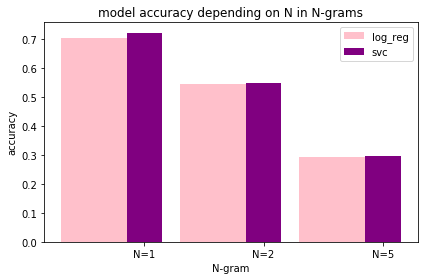

In [236]:
import numpy as np
import matplotlib.pyplot as plt


log_reg = (lr_unigr, lr_bigrams, lr_fgrams)
svc = (svc_unigr, svc_bigrams, svc_fgrams)

fig, ax = plt.subplots()
index = np.arange(3)
bar_width = 0.3

rects1 = plt.bar(index, log_reg,  label='log_reg', color="pink")
rects2 = plt.bar(index + bar_width, svc, bar_width, label='svc', color = 'purple')

plt.xlabel('N-gram')
plt.ylabel('accuracy')
plt.title('model accuracy depending on N in N-grams')
plt.xticks(index + bar_width, ('N=1', 'N=2', 'N=5'))
plt.legend()

plt.tight_layout()
plt.show()

**Задание 2: Поработать с другими эмбеддингами для слов (например word2vec или GloVe)**

In [130]:
all_tokens_split = [[] for i in range(len(all_tokens))]
for i in range(len(all_tokens_ms)):
    all_tokens_split[i] = all_tokens_ms[i].split()

In [131]:
print(all_tokens_split[1])

['светильник', 'потолочный', 'swarovski', 'светильник', 'потолочный', 'swarovski', '6', 'штука', ',', 'цена', 'за', 'штука', '.', 'в', 'эксплуатация', '2', 'год', ',', 'продаваться', 'в', 'связь', 'со', 'смена', 'интерьер', 'в', 'квартира']


In [ ]:
Обучим 

In [18]:
import gensim
from gensim.models import Word2Vec

In [1]:
# data = gensim.models.word2vec.LineSentence('\n'.join(all_tokens_split))

In [2]:
# from gensim.models import Word2Vec

# model_wv = Word2Vec(all_tokens_split, min_count=1)

**Задание 3** Другие способы токенизации (pymorphy2, spaCy)

In [47]:
from pymorphy2 import MorphAnalyzer
from pymorphy2.tokenizers import simple_word_tokenize

morph = MorphAnalyzer()

In [53]:
X_train_pm = X_train.copy()
X_test_pm = X_test.copy()

In [54]:
def preprocess_pm(text: str) -> str:
    words = [w.lower() for w in simple_word_tokenize(text)]
    ans = ' '.join(words)
    return ans

Токенизируем X_test_pm, X_train_pm с помощью токенизатора Pymorpy:

In [56]:
all_tokens_pm = []
all_tokens_pm_t = []

for i in range(len(X_train)):
    X_train_pm[i][0], X_train_pm[i][1] = preprocess_pm(X_train[i][0]), preprocess_pm(X_train[i][1])
    all_tokens_pm.append(' '.join(X_train_pm[i]))
for i in range(len(X_test)):
    X_test_pm[i][0], X_test_pm[i][1] = preprocess_pm(X_test_pm[i][0]), preprocess_pm(X_test_pm[i][1])
    all_tokens_pm_t.append(' '.join(X_test_pm[i]))

Теперь оценим качество методом HashingVectorizer вначале логистической регрессией:

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

In [60]:
vec = HashingVectorizer(n_features=20000)
X_pm = vec.fit_transform(all_tokens_pm)

clf = LogisticRegression(random_state=42)
clf.fit(X_pm, y_train)

/Users/pikachu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pikachu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
pm_lr = accuracy_score(clf.predict(vec.transform(all_tokens_pm_t)), y_test)
print(pm_lr)

0.7181111111111111


Теперь методом опорных векторов:

In [76]:
svc_model = LinearSVC(C = 0.1, max_iter=10000)
svc_model.fit(X_pm, y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [135]:
pm_svc = accuracy_score(svc_model.predict(vec.transform(all_tokens_pm_t)), y_test)
print(pm_svc)

0.8128888888888889


Скажем, что качество для линейной регрессии одинаково относительно неплохое, а, судя по результату измерения качества метода опорных векторов, работа токенайзера nltk помогает лучше выполнять поставленную задачу.

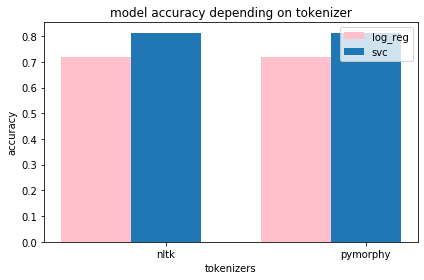

In [145]:
import numpy as np
import matplotlib.pyplot as plt


log_reg = (pm_lr, n_lr)
svc = (pm_svc, n_svc)

fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.3

rects1 = plt.bar(index, log_reg, bar_width, label='log_reg', color="pink")

rects2 = plt.bar(index + bar_width, svc, bar_width, label='svc')

plt.xlabel('tokenizers')
plt.ylabel('accuracy')
plt.title('model accuracy depending on tokenizer')
plt.xticks(index + bar_width, ('nltk', 'pymorphy'))
plt.legend()

plt.tight_layout()
plt.show()

**Задание 4**


Хочу отметить, что такого качества я добилась выше в методе hashing vectoriser и при использовании лемматизатора Mystem, так как я использовала сразу данные с title и description, могу сказать, что такой метод мне показался самым эффективным, можно сделать то же самое, но чтобы данными были леммы, думаю, качество будет лучше.

In [ ]:
# две строчки кода здесь